In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Implementing activation functions with numpy

## Sigmoid

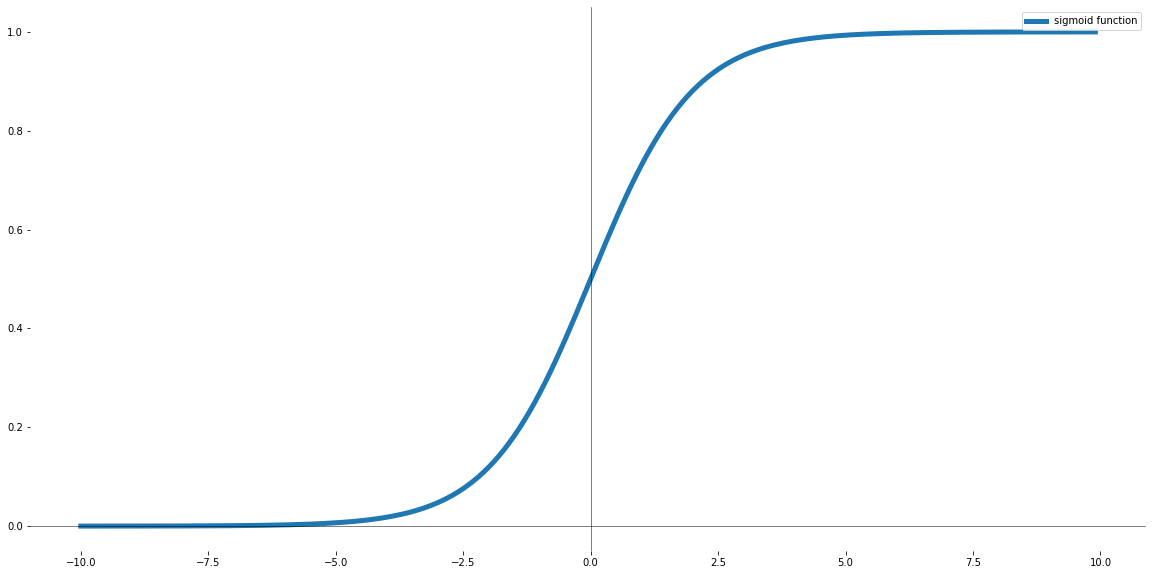

In [53]:
x = np.arange(-10,10,0.1)
z = 1/(1 + np.exp(-x))

plt.figure(figsize=(20, 10))
plt.plot(x, z, label = 'sigmoid function', lw=5)
plt.axvline(lw=0.5, c='black')
plt.axhline(lw=0.5, c='black')
plt.box(on=None)
plt.legend()
plt.show()

## Tanh

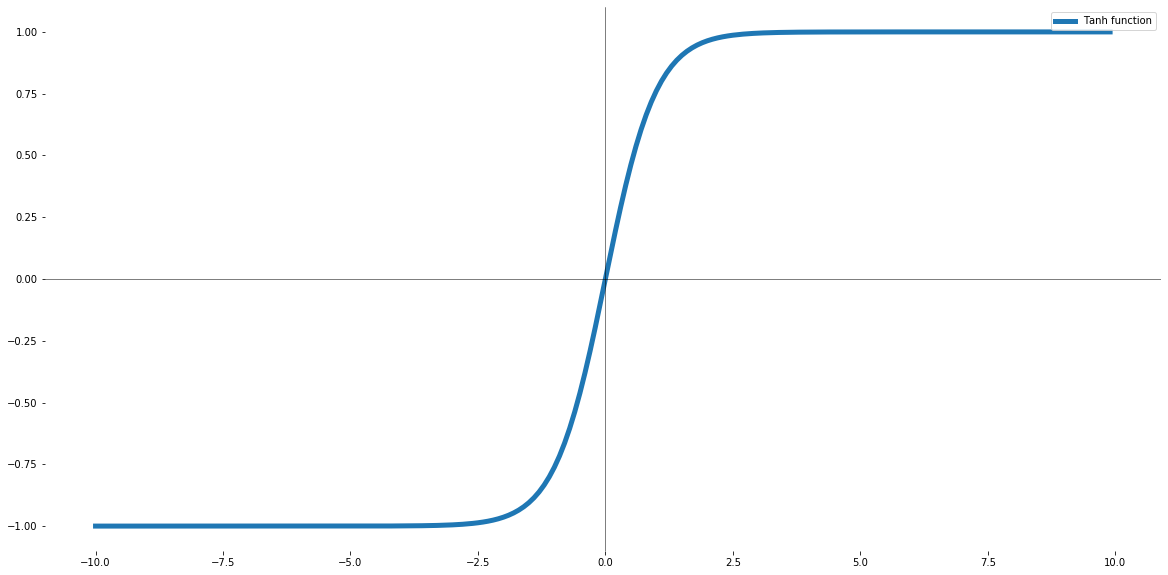

In [52]:
x = np.arange(-10,10,0.1)
z = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

plt.figure(figsize=(20, 10))
plt.plot(x, z, label = 'Tanh function', lw=5)
plt.axvline(lw=0.5, c='black')
plt.axhline(lw=0.5, c='black')
plt.box(on=None)
plt.legend()
plt.show()

## Relu

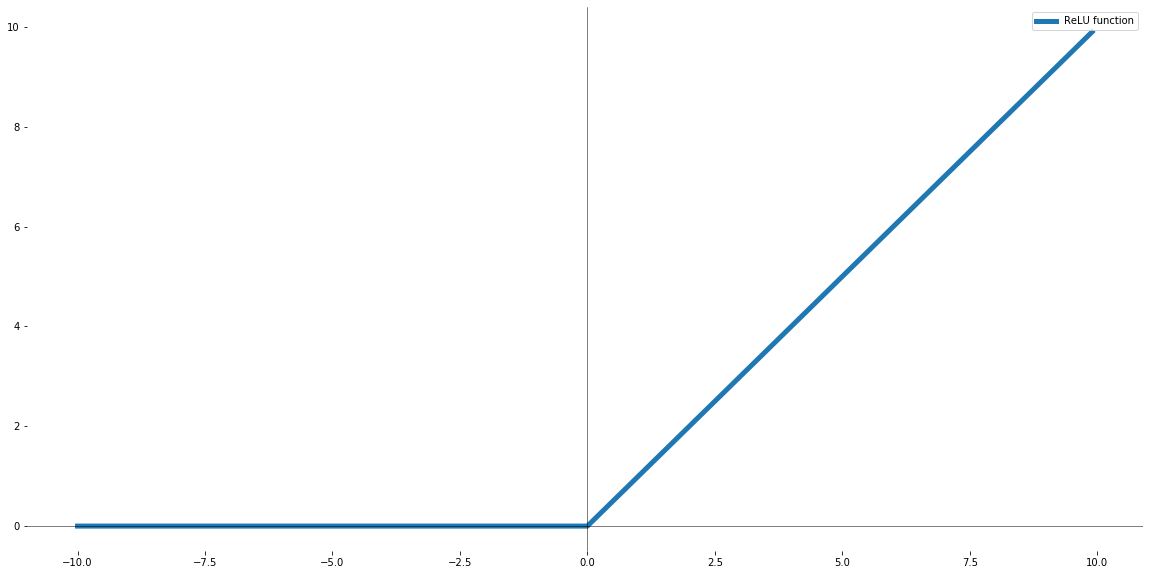

In [51]:
x = np.arange(-10,10,0.1)
z = np.maximum(0, x)

plt.figure(figsize=(20, 10))
plt.plot(x, z, label = 'ReLU function', lw=5)
plt.axvline(lw=0.5, c='black')
plt.axhline(lw=0.5, c='black')
plt.box(on=None)
plt.legend()
plt.show()

## Leaky ReLU

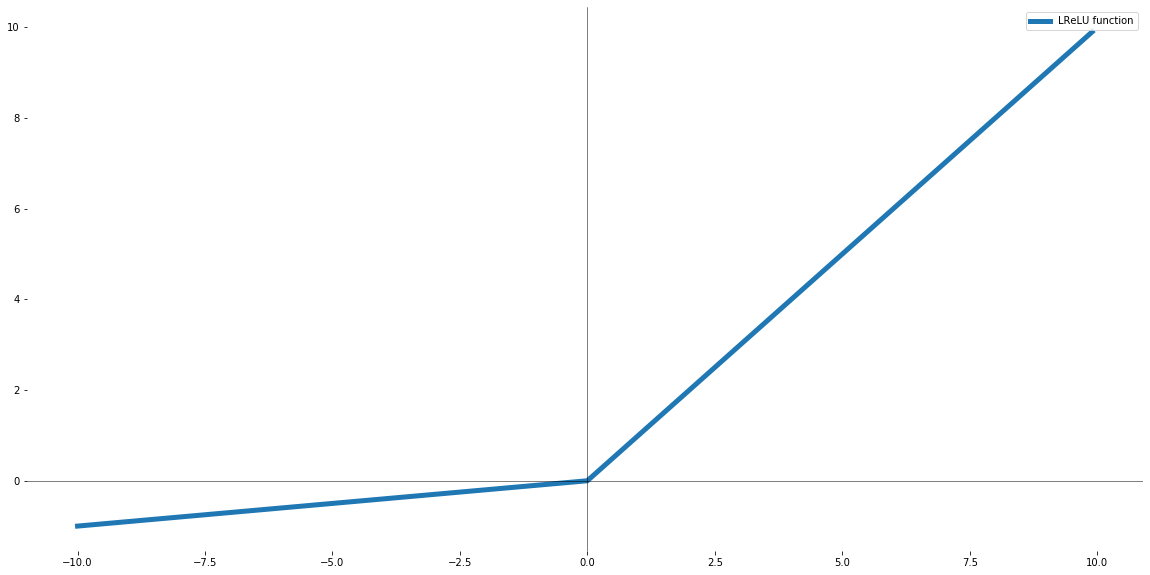

In [50]:
x = np.arange(-10,10,0.1)
z = np.maximum(0.1*x, x)

plt.figure(figsize=(20, 10))
plt.plot(x, z, label = 'LReLU function', lw=5)
plt.axvline(lw=0.5, c='black')
plt.axhline(lw=0.5, c='black')
plt.box(on=None)
plt.legend()
plt.show()

## ELU

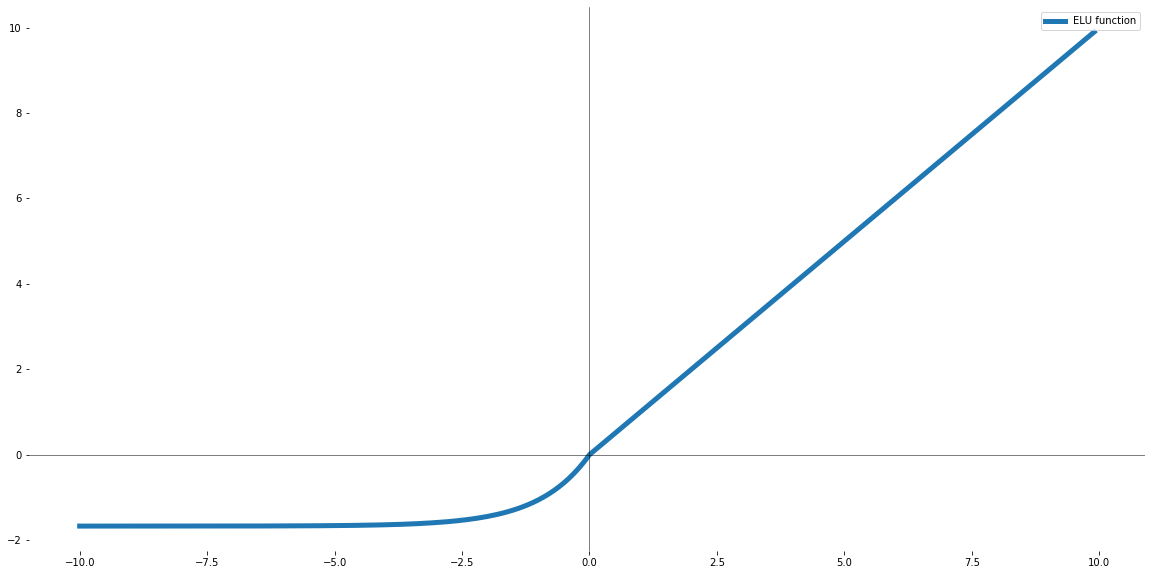

In [79]:
x1 = np.arange(-10,0,0.1)
x2 = np.arange(0,10,0.1)
alpha = 1.67326324

z1 = alpha * (np.exp(x1) - 1)
z2 = x2

plt.figure(figsize=(20, 10))
plt.plot(np.append(x1, x2), np.append(z1, z2), label = 'ELU function', lw=5)
plt.axvline(lw=0.5, c='black')
plt.axhline(lw=0.5, c='black')
plt.box(on=None)
plt.legend()
plt.show()

## SELU

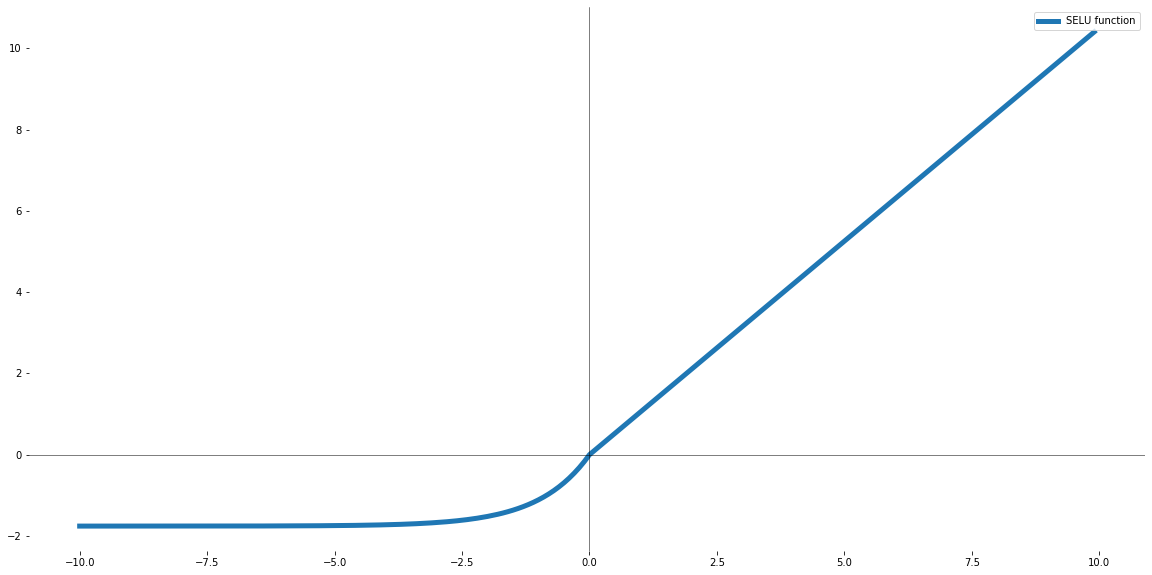

In [80]:
x1 = np.arange(-10,0,0.1)
x2 = np.arange(0,10,0.1)
alpha = 1.67326324
scale = 1.05070098

z1 = scale * alpha * (np.exp(x1) - 1)
z2 = scale * x2

plt.figure(figsize=(20, 10))
plt.plot(np.append(x1, x2), np.append(z1, z2), label = 'SELU function', lw=5)
plt.axvline(lw=0.5, c='black')
plt.axhline(lw=0.5, c='black')
plt.box(on=None)
plt.legend()
plt.show()

## Swish

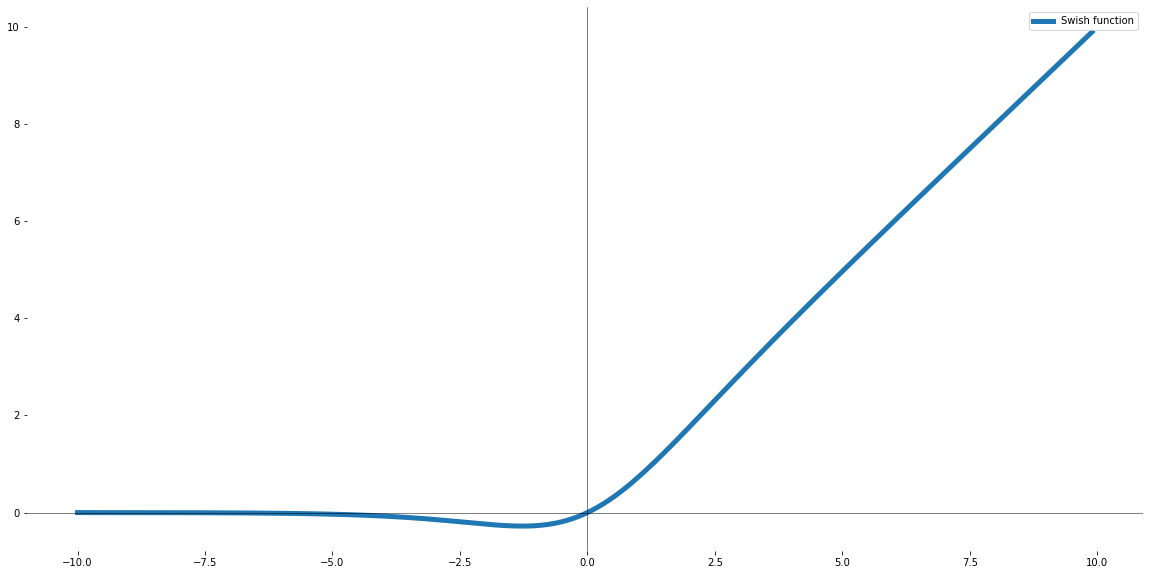

In [77]:
x = np.arange(-10,10,0.1)
z = x * (1/(1 + np.exp(-x)))

plt.figure(figsize=(20, 10))
plt.plot(x, z, label = 'Swish function', lw=5)
plt.axvline(lw=0.5, c='black')
plt.axhline(lw=0.5, c='black')
plt.box(on=None)
plt.legend()
plt.show()

## Chapter 11

In [118]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

In [121]:
X,y = load_iris(return_X_y=True)

In [122]:
y = pd.get_dummies(y).values

In [123]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [125]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [127]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])


model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
4/4 [==============================] - 0s 21ms/step - loss: 0.8027 - accuracy: 0.6759 - val_loss: 0.8435 - val_accuracy: 0.5926
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 0.7656 - accuracy: 0.6852 - val_loss: 0.8297 - val_accuracy: 0.5926
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 0.7422 - accuracy: 0.6852 - val_loss: 0.7914 - val_accuracy: 0.5926
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.7205 - accuracy: 0.6852 - val_loss: 0.7690 - val_accuracy: 0.5926
Epoch 5/20
4/4 [==============================] - 0s 5ms/step - loss: 0.7014 - accuracy: 0.6852 - val_loss: 0.7797 - val_accuracy: 0.5926
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.6852 - val_loss: 0.7525 - val_accuracy: 0.5926
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.6688 - accuracy: 0.6852 - val_loss: 0.7242 - val_accuracy: 0.5926
Epoch 8/20
4/4 [=================